# Objectives

In [1]:
# Clean data
# Drop redundant columns
# Calculate the Decay score
# Calculate the annual decay percentage
# Calculate the Days since inspection
# Calculate the Priority Score
# Visualize the data gotten
# Get a report showing the R-squared and p-values
# Get a Bridge Decay Prediction Model using RandonTreeForest

# Data Cleaning and Analysis

In [2]:
# Import necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import f_oneway
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Assign the data to a variable
df = pd.read_csv("Bridge_Ratings_20250604.csv")
df

,BIN,BORO,FEATURE CARRIED,FEATURE CROSSED,RAIL ROAD,BRIDGE TYPE,OTHER OWNER,SPANS,RATING SOURCE,INSPECTION DATE,GENERAL RECOMMENDATION**,Current Rating*,Verbal Rating,DECK AREA (SQ FT),REPLACEMENT COST,X - COORD (LAT),Y - COORD (LON),CD,CD2,CD3
0,1065210,Q,WHITESTONE EXP NB,BCIP,NaN,A,NaN,1,STATE,06/07/2018,5,5.127,GOOD,2480,11160000,40.789754,-73.822434,407,NaN,NaN
1,1066510,B,BRUCKNER EXPWY SVC RD,WESTCHESTER CREEK,NaN,WMA,NaN,17,STATE,09/21/2018,3,3.104,FAIR,35000,157500000,40.828966,-73.842711,209,NaN,NaN
2,1067150,B,NEREID AVE (E 240TH ST),BRONX RIVER PKWY,M,O,NaN,10,STATE,10/12/2017,5,4.379,FAIR,58125,261562500,40.900821,-73.860848,212,NaN,NaN
3,1240090,BM,MACOMBS DAM BRIDGE,HARLEM RIVER,M,WMO,NaN,52,STATE,12/11/2017,5,4.197,FAIR,220000,990000000,40.828110,-73.933921,110,204.0,NaN
4,1247010,Q,91 PLACE (2247010),LIRR PT WASH BR,L,O,NaN,1,STATE,10/12/2017,6,6.167,VGOOD,2760,12420000,40.742973,-73.874100,404,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,222934A,M,RAMP TO N.B. HHP,AMTRAK WEST SIDE,A,AR,NaN,26,STATE,11/27/2019,4,3.661,FAIR,10800,48600000,40.866987,-73.931476,112,NaN,NaN
1578,2240210,B,CITY ISLAND ROAD,EASTCHESTER BAY,NaN,WO,NaN,3,STATE,12/09/2019,7,6.611,VGOOD,40281,181264500,40.856236,-73.793217,228,NaN,NaN
1579,2246090,M,PED BRDG OPP 65 ST,TRANSVERSE RD #1,NaN,PED-O,P,1,CITY,12/10/2019,4,4.583,FAIR,2300,10350000,40.769417,-73.973943,164,NaN,NaN
1580,2240138,BM,NYCTA IRT,HARLEM RVR/BROADWAY,TM,WMO,NaN,3,STATE,12/18/2019,5,5.260,GOOD,19520,87840000,40.873465,-73.911285,112,207.0,208.0


In [4]:
# Get Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BIN                       1582 non-null   object 
 1   BORO                      1582 non-null   object 
 2   FEATURE CARRIED           1582 non-null   object 
 3   FEATURE CROSSED           1582 non-null   object 
 4   RAIL ROAD                 640 non-null    object 
 5   BRIDGE TYPE               1582 non-null   object 
 6   OTHER OWNER               277 non-null    object 
 7   SPANS                     1582 non-null   int64  
 8   RATING SOURCE             1582 non-null   object 
 9   INSPECTION DATE           1582 non-null   object 
 10  GENERAL RECOMMENDATION**  1582 non-null   int64  
 11  Current Rating*           1582 non-null   float64
 12  Verbal Rating             1582 non-null   object 
 13  DECK AREA (SQ FT)         1582 non-null   int64  
 14  REPLACEM

In [5]:
# Get the statistical Information of the dataset
df.describe()

,SPANS,GENERAL RECOMMENDATION**,Current Rating*,DECK AREA (SQ FT),REPLACEMENT COST,X - COORD (LAT),Y - COORD (LON),CD,CD2,CD3
count,1582.000000,1582.000000,1582.000000,1582.000000,1.582000e+03,1582.000000,1582.000000,1582.000000,167.000000,16.000000
mean,6.237042,5.034134,5.128417,19701.695322,8.865763e+07,40.736024,-73.936649,284.989254,278.425150,266.000000
std,19.578353,0.863248,0.919741,62128.215607,2.795770e+08,0.089351,0.092914,127.898498,111.872691,114.026897
min,1.000000,1.000000,1.000000,273.000000,1.228500e+06,40.513378,-74.251002,101.000000,103.000000,101.000000
25%,1.000000,4.250000,4.426750,3362.000000,1.512900e+07,40.667073,-73.984778,201.000000,204.000000,203.250000
50%,2.000000,5.000000,5.101000,5974.000000,2.688300e+07,40.746456,-73.935395,306.000000,211.000000,208.000000
75%,4.000000,6.000000,5.887000,11542.000000,5.193900e+07,40.803512,-73.888520,405.000000,402.000000,401.000000
max,403.000000,7.000000,6.906000,824000.000000,3.708000e+09,40.905797,-73.722642,503.000000,482.000000,404.000000


In [6]:
# Unique values of 'Current Rating*' Column
df['Current Rating*'].unique()

array([5.127, 3.104, 4.379, 4.197, 6.167, 4.138, 2.883, 4.69 , 4.182,
       4.188, 4.333, 3.565, 4.972, 4.625, 5.458, 4.453, 5.837, 5.611,
       5.373, 4.014, 4.833, 4.75 , 5.606, 5.365, 5.81 , 4.25 , 3.847,
       3.882, 4.433, 5.765, 6.559, 4.492, 6.071, 3.643, 3.688, 6.185,
       6.565, 5.913, 5.125, 3.3  , 3.855, 4.031, 5.   , 6.467, 4.559,
       5.421, 6.553, 5.079, 5.123, 6.026, 6.5  , 4.548, 4.632, 5.194,
       4.167, 5.417, 4.6  , 4.879, 5.633, 4.444, 6.256, 5.344, 4.733,
       5.889, 5.207, 6.25 , 5.847, 5.706, 6.44 , 6.297, 4.161, 4.543,
       5.931, 5.299, 6.691, 6.094, 6.359, 6.615, 6.067, 6.267, 5.8  ,
       6.2  , 4.814, 5.279, 5.267, 5.551, 5.764, 5.833, 5.719, 5.982,
       5.94 , 6.132, 5.778, 5.621, 6.186, 6.465, 5.083, 4.986, 4.611,
       5.431, 6.614, 5.789, 6.246, 5.696, 6.191, 6.474, 6.033, 5.75 ,
       4.779, 4.236, 4.139, 4.306, 6.152, 5.763, 5.703, 5.483, 4.861,
       5.259, 6.885, 4.431, 4.   , 5.353, 6.46 , 3.702, 6.231, 4.156,
       5.819, 6.4  ,

In [7]:
# Create a new column for verbal score and assign values to it
df['Verbal Rating'].unique()
rating_map = {'CLOSED' : 0, 'IMMINENT FAILURE': 1, 'CRITICAL': 2, 'SERIOUS': 3, 'POOR': 4, 'FAIR': 5, 'SATISFACTORY': 6, 'GOOD': 7, 'VGOOD': 8, 'EXCELLENT': 9}
df['Verbal_Score'] = df['Verbal Rating'].map(rating_map)
df

,BIN,BORO,FEATURE CARRIED,FEATURE CROSSED,RAIL ROAD,BRIDGE TYPE,OTHER OWNER,SPANS,RATING SOURCE,INSPECTION DATE,...,Current Rating*,Verbal Rating,DECK AREA (SQ FT),REPLACEMENT COST,X - COORD (LAT),Y - COORD (LON),CD,CD2,CD3,Verbal_Score
0,1065210,Q,WHITESTONE EXP NB,BCIP,NaN,A,NaN,1,STATE,06/07/2018,...,5.127,GOOD,2480,11160000,40.789754,-73.822434,407,NaN,NaN,7
1,1066510,B,BRUCKNER EXPWY SVC RD,WESTCHESTER CREEK,NaN,WMA,NaN,17,STATE,09/21/2018,...,3.104,FAIR,35000,157500000,40.828966,-73.842711,209,NaN,NaN,5
2,1067150,B,NEREID AVE (E 240TH ST),BRONX RIVER PKWY,M,O,NaN,10,STATE,10/12/2017,...,4.379,FAIR,58125,261562500,40.900821,-73.860848,212,NaN,NaN,5
3,1240090,BM,MACOMBS DAM BRIDGE,HARLEM RIVER,M,WMO,NaN,52,STATE,12/11/2017,...,4.197,FAIR,220000,990000000,40.828110,-73.933921,110,204.0,NaN,5
4,1247010,Q,91 PLACE (2247010),LIRR PT WASH BR,L,O,NaN,1,STATE,10/12/2017,...,6.167,VGOOD,2760,12420000,40.742973,-73.874100,404,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,222934A,M,RAMP TO N.B. HHP,AMTRAK WEST SIDE,A,AR,NaN,26,STATE,11/27/2019,...,3.661,FAIR,10800,48600000,40.866987,-73.931476,112,NaN,NaN,5
1578,2240210,B,CITY ISLAND ROAD,EASTCHESTER BAY,NaN,WO,NaN,3,STATE,12/09/2019,...,6.611,VGOOD,40281,181264500,40.856236,-73.793217,228,NaN,NaN,8
1579,2246090,M,PED BRDG OPP 65 ST,TRANSVERSE RD #1,NaN,PED-O,P,1,CITY,12/10/2019,...,4.583,FAIR,2300,10350000,40.769417,-73.973943,164,NaN,NaN,5
1580,2240138,BM,NYCTA IRT,HARLEM RVR/BROADWAY,TM,WMO,NaN,3,STATE,12/18/2019,...,5.260,GOOD,19520,87840000,40.873465,-73.911285,112,207.0,208.0,7


In [8]:
# Unique values of 'Verbal Rating' column
df['Verbal Rating'].unique()

array(['GOOD', 'FAIR', 'VGOOD', 'POOR', 'CLOSED'], dtype=object)

In [9]:
# Normalize Current Rating (assuming scale 0–10)
df['NORMALIZED CURRENT'] = df['Current Rating*']

# Normalize Inspection Date (penalize older inspections)
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
df['DAYS SINCE INSPECTION'] = (datetime.now() - df['INSPECTION DATE']).dt.days
df['INSPECTION SCORE'] = 100 - (df['DAYS SINCE INSPECTION'] / 365 * 10).clip(0, 100)

# Calculate Decay Score (weighted average)
df['DECAY SCORE'] = (
    df['NORMALIZED CURRENT'] * 0.4 +
    df['Verbal_Score'] * 25 * 0.3 +  # Scaled to 0–100
    df['INSPECTION SCORE'] * 0.3
)

# Aggregate by Borough
decay_by_boro = df.groupby('BORO')['DECAY SCORE'].mean().sort_values()
print(decay_by_boro)

BORO
KM    49.426465
KQ    53.125784
MQ    54.431868
M     55.726368
Q     57.481854
R     57.736160
B     59.059878
BM    60.343676
K     60.603535
0     63.882192
Name: DECAY SCORE, dtype: float64


In [10]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   BIN                       1582 non-null   object        
 1   BORO                      1582 non-null   object        
 2   FEATURE CARRIED           1582 non-null   object        
 3   FEATURE CROSSED           1582 non-null   object        
 4   RAIL ROAD                 640 non-null    object        
 5   BRIDGE TYPE               1582 non-null   object        
 6   OTHER OWNER               277 non-null    object        
 7   SPANS                     1582 non-null   int64         
 8   RATING SOURCE             1582 non-null   object        
 9   INSPECTION DATE           1582 non-null   datetime64[ns]
 10  GENERAL RECOMMENDATION**  1582 non-null   int64         
 11  Current Rating*           1582 non-null   float64       
 12  Verbal Rating       

In [11]:
# Drop redundant columns
df = df.drop(columns = ['OTHER OWNER', 'RAIL ROAD', 'CD2', 'CD3'])
df

,BIN,BORO,FEATURE CARRIED,FEATURE CROSSED,BRIDGE TYPE,SPANS,RATING SOURCE,INSPECTION DATE,GENERAL RECOMMENDATION**,Current Rating*,...,DECK AREA (SQ FT),REPLACEMENT COST,X - COORD (LAT),Y - COORD (LON),CD,Verbal_Score,NORMALIZED CURRENT,DAYS SINCE INSPECTION,INSPECTION SCORE,DECAY SCORE
0,1065210,Q,WHITESTONE EXP NB,BCIP,A,1,STATE,2018-06-07,5,5.127,...,2480,11160000,40.789754,-73.822434,407,7,5.127,2574,29.479452,63.394636
1,1066510,B,BRUCKNER EXPWY SVC RD,WESTCHESTER CREEK,WMA,17,STATE,2018-09-21,3,3.104,...,35000,157500000,40.828966,-73.842711,209,5,3.104,2468,32.383562,48.456668
2,1067150,B,NEREID AVE (E 240TH ST),BRONX RIVER PKWY,O,10,STATE,2017-10-12,5,4.379,...,58125,261562500,40.900821,-73.860848,212,5,4.379,2812,22.958904,46.139271
3,1240090,BM,MACOMBS DAM BRIDGE,HARLEM RIVER,WMO,52,STATE,2017-12-11,5,4.197,...,220000,990000000,40.828110,-73.933921,110,5,4.197,2752,24.602740,46.559622
4,1247010,Q,91 PLACE (2247010),LIRR PT WASH BR,O,1,STATE,2017-10-12,6,6.167,...,2760,12420000,40.742973,-73.874100,404,8,6.167,2812,22.958904,69.354471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,222934A,M,RAMP TO N.B. HHP,AMTRAK WEST SIDE,AR,26,STATE,2019-11-27,4,3.661,...,10800,48600000,40.866987,-73.931476,112,5,3.661,2036,44.219178,52.230153
1578,2240210,B,CITY ISLAND ROAD,EASTCHESTER BAY,WO,3,STATE,2019-12-09,7,6.611,...,40281,181264500,40.856236,-73.793217,228,8,6.611,2024,44.547945,76.008784
1579,2246090,M,PED BRDG OPP 65 ST,TRANSVERSE RD #1,PED-O,1,CITY,2019-12-10,4,4.583,...,2300,10350000,40.769417,-73.973943,164,5,4.583,2023,44.575342,52.705803
1580,2240138,BM,NYCTA IRT,HARLEM RVR/BROADWAY,WMO,3,STATE,2019-12-18,5,5.260,...,19520,87840000,40.873465,-73.911285,112,7,5.260,2015,44.794521,68.042356


In [12]:
df = df.drop_duplicates()  # Remove exact duplicate rows
df = df.drop_duplicates(subset=['BIN'])  # Remove duplicates by bridge ID (if applicable)

In [13]:
# Create new columns and assign the necessary values
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
df['INSPECTION YEAR'] = df['INSPECTION DATE'].dt.year
df['INSPECTION MONTH'] = df['INSPECTION DATE'].dt.month
df['INSPECTION DAY'] = df['INSPECTION DATE'].dt.day
df

,BIN,BORO,FEATURE CARRIED,FEATURE CROSSED,BRIDGE TYPE,SPANS,RATING SOURCE,INSPECTION DATE,GENERAL RECOMMENDATION**,Current Rating*,...,Y - COORD (LON),CD,Verbal_Score,NORMALIZED CURRENT,DAYS SINCE INSPECTION,INSPECTION SCORE,DECAY SCORE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY
0,1065210,Q,WHITESTONE EXP NB,BCIP,A,1,STATE,2018-06-07,5,5.127,...,-73.822434,407,7,5.127,2574,29.479452,63.394636,2018,6,7
1,1066510,B,BRUCKNER EXPWY SVC RD,WESTCHESTER CREEK,WMA,17,STATE,2018-09-21,3,3.104,...,-73.842711,209,5,3.104,2468,32.383562,48.456668,2018,9,21
2,1067150,B,NEREID AVE (E 240TH ST),BRONX RIVER PKWY,O,10,STATE,2017-10-12,5,4.379,...,-73.860848,212,5,4.379,2812,22.958904,46.139271,2017,10,12
3,1240090,BM,MACOMBS DAM BRIDGE,HARLEM RIVER,WMO,52,STATE,2017-12-11,5,4.197,...,-73.933921,110,5,4.197,2752,24.602740,46.559622,2017,12,11
4,1247010,Q,91 PLACE (2247010),LIRR PT WASH BR,O,1,STATE,2017-10-12,6,6.167,...,-73.874100,404,8,6.167,2812,22.958904,69.354471,2017,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,M00005,M,E 72ND ST,FDR SB EXIT RAMP,PED-A,1,CITY,2018-06-02,5,4.750,...,-73.951598,108,5,4.750,2579,29.342466,48.202740,2018,6,2
978,2241850,B,CONN RD BETWEEN MOS,METRO NORTH RR-HAR,O,1,STATE,2018-04-21,4,4.281,...,-73.879616,227,5,4.281,2621,28.191781,47.669934,2018,4,21
1126,2232060,M,FDR DRIVE,AVE C TO E 23RD ST,A,46,STATE,2018-08-27,5,4.493,...,-73.974840,106,5,4.493,2493,31.698630,48.806789,2018,8,27
1345,7702990,M,FT WASHTN PARK RD,AMTRAK-W SIDE CON,PED-O,1,CITY,2019-06-13,3,2.732,...,-73.943878,112,4,2.732,2203,39.643836,42.985951,2019,6,13


In [14]:
# Get the percentage of Verbal Rating
df['Verbal Rating'].value_counts(normalize=True) * 100 

Verbal Rating
FAIR      45.843829
GOOD      30.352645
VGOOD     22.795970
POOR       0.503778
CLOSED     0.503778
Name: proportion, dtype: float64

In [15]:
# Number of days since inspection
df['DAYS SINCE INSPECTION'] = (pd.to_datetime('today') - pd.to_datetime(df['INSPECTION DATE'])).dt.days
df

,BIN,BORO,FEATURE CARRIED,FEATURE CROSSED,BRIDGE TYPE,SPANS,RATING SOURCE,INSPECTION DATE,GENERAL RECOMMENDATION**,Current Rating*,...,Y - COORD (LON),CD,Verbal_Score,NORMALIZED CURRENT,DAYS SINCE INSPECTION,INSPECTION SCORE,DECAY SCORE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY
0,1065210,Q,WHITESTONE EXP NB,BCIP,A,1,STATE,2018-06-07,5,5.127,...,-73.822434,407,7,5.127,2574,29.479452,63.394636,2018,6,7
1,1066510,B,BRUCKNER EXPWY SVC RD,WESTCHESTER CREEK,WMA,17,STATE,2018-09-21,3,3.104,...,-73.842711,209,5,3.104,2468,32.383562,48.456668,2018,9,21
2,1067150,B,NEREID AVE (E 240TH ST),BRONX RIVER PKWY,O,10,STATE,2017-10-12,5,4.379,...,-73.860848,212,5,4.379,2812,22.958904,46.139271,2017,10,12
3,1240090,BM,MACOMBS DAM BRIDGE,HARLEM RIVER,WMO,52,STATE,2017-12-11,5,4.197,...,-73.933921,110,5,4.197,2752,24.602740,46.559622,2017,12,11
4,1247010,Q,91 PLACE (2247010),LIRR PT WASH BR,O,1,STATE,2017-10-12,6,6.167,...,-73.874100,404,8,6.167,2812,22.958904,69.354471,2017,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,M00005,M,E 72ND ST,FDR SB EXIT RAMP,PED-A,1,CITY,2018-06-02,5,4.750,...,-73.951598,108,5,4.750,2579,29.342466,48.202740,2018,6,2
978,2241850,B,CONN RD BETWEEN MOS,METRO NORTH RR-HAR,O,1,STATE,2018-04-21,4,4.281,...,-73.879616,227,5,4.281,2621,28.191781,47.669934,2018,4,21
1126,2232060,M,FDR DRIVE,AVE C TO E 23RD ST,A,46,STATE,2018-08-27,5,4.493,...,-73.974840,106,5,4.493,2493,31.698630,48.806789,2018,8,27
1345,7702990,M,FT WASHTN PARK RD,AMTRAK-W SIDE CON,PED-O,1,CITY,2019-06-13,3,2.732,...,-73.943878,112,4,2.732,2203,39.643836,42.985951,2019,6,13


In [16]:
# Annual Decay Percentage
df['ANNUAL DECAY PERCENTAGE'] = ((df['Current Rating*'].max() - df['Current Rating*']) / (df['DAYS SINCE INSPECTION'] / 365)) * 100
df

,BIN,BORO,FEATURE CARRIED,FEATURE CROSSED,BRIDGE TYPE,SPANS,RATING SOURCE,INSPECTION DATE,GENERAL RECOMMENDATION**,Current Rating*,...,CD,Verbal_Score,NORMALIZED CURRENT,DAYS SINCE INSPECTION,INSPECTION SCORE,DECAY SCORE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY,ANNUAL DECAY PERCENTAGE
0,1065210,Q,WHITESTONE EXP NB,BCIP,A,1,STATE,2018-06-07,5,5.127,...,407,7,5.127,2574,29.479452,63.394636,2018,6,7,25.226690
1,1066510,B,BRUCKNER EXPWY SVC RD,WESTCHESTER CREEK,WMA,17,STATE,2018-09-21,3,3.104,...,209,5,3.104,2468,32.383562,48.456668,2018,9,21,56.228930
2,1067150,B,NEREID AVE (E 240TH ST),BRONX RIVER PKWY,O,10,STATE,2017-10-12,5,4.379,...,212,5,4.379,2812,22.958904,46.139271,2017,10,12,32.800676
3,1240090,BM,MACOMBS DAM BRIDGE,HARLEM RIVER,WMO,52,STATE,2017-12-11,5,4.197,...,110,5,4.197,2752,24.602740,46.559622,2017,12,11,35.929687
4,1247010,Q,91 PLACE (2247010),LIRR PT WASH BR,O,1,STATE,2017-10-12,6,6.167,...,404,8,6.167,2812,22.958904,69.354471,2017,10,12,9.592283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,M00005,M,E 72ND ST,FDR SB EXIT RAMP,PED-A,1,CITY,2018-06-02,5,4.750,...,108,5,4.750,2579,29.342466,48.202740,2018,6,2,30.513377
978,2241850,B,CONN RD BETWEEN MOS,METRO NORTH RR-HAR,O,1,STATE,2018-04-21,4,4.281,...,227,5,4.281,2621,28.191781,47.669934,2018,4,21,36.555704
1126,2232060,M,FDR DRIVE,AVE C TO E 23RD ST,A,46,STATE,2018-08-27,5,4.493,...,106,5,4.493,2493,31.698630,48.806789,2018,8,27,35.328720
1345,7702990,M,FT WASHTN PARK RD,AMTRAK-W SIDE CON,PED-O,1,CITY,2019-06-13,3,2.732,...,112,4,2.732,2203,39.643836,42.985951,2019,6,13,69.156151


In [17]:
df['PRIORITY SCORE'] = (
    (10 - df['Current Rating*']) * 0.5 + 
    (df['REPLACEMENT COST'] / 1e6) * 0.3 + 
    (df['DAYS SINCE INSPECTION'] / 365) * 0.2
)
df

,BIN,BORO,FEATURE CARRIED,FEATURE CROSSED,BRIDGE TYPE,SPANS,RATING SOURCE,INSPECTION DATE,GENERAL RECOMMENDATION**,Current Rating*,...,Verbal_Score,NORMALIZED CURRENT,DAYS SINCE INSPECTION,INSPECTION SCORE,DECAY SCORE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY,ANNUAL DECAY PERCENTAGE,PRIORITY SCORE
0,1065210,Q,WHITESTONE EXP NB,BCIP,A,1,STATE,2018-06-07,5,5.127,...,7,5.127,2574,29.479452,63.394636,2018,6,7,25.226690,7.194911
1,1066510,B,BRUCKNER EXPWY SVC RD,WESTCHESTER CREEK,WMA,17,STATE,2018-09-21,3,3.104,...,5,3.104,2468,32.383562,48.456668,2018,9,21,56.228930,52.050329
2,1067150,B,NEREID AVE (E 240TH ST),BRONX RIVER PKWY,O,10,STATE,2017-10-12,5,4.379,...,5,4.379,2812,22.958904,46.139271,2017,10,12,32.800676,82.820072
3,1240090,BM,MACOMBS DAM BRIDGE,HARLEM RIVER,WMO,52,STATE,2017-12-11,5,4.197,...,5,4.197,2752,24.602740,46.559622,2017,12,11,35.929687,301.409445
4,1247010,Q,91 PLACE (2247010),LIRR PT WASH BR,O,1,STATE,2017-10-12,6,6.167,...,8,6.167,2812,22.958904,69.354471,2017,10,12,9.592283,7.183322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,M00005,M,E 72ND ST,FDR SB EXIT RAMP,PED-A,1,CITY,2018-06-02,5,4.750,...,5,4.750,2579,29.342466,48.202740,2018,6,2,30.513377,5.968651
978,2241850,B,CONN RD BETWEEN MOS,METRO NORTH RR-HAR,O,1,STATE,2018-04-21,4,4.281,...,5,4.281,2621,28.191781,47.669934,2018,4,21,36.555704,11.740914
1126,2232060,M,FDR DRIVE,AVE C TO E 23RD ST,A,46,STATE,2018-08-27,5,4.493,...,5,4.493,2493,31.698630,48.806789,2018,8,27,35.328720,251.390927
1345,7702990,M,FT WASHTN PARK RD,AMTRAK-W SIDE CON,PED-O,1,CITY,2019-06-13,3,2.732,...,4,2.732,2203,39.643836,42.985951,2019,6,13,69.156151,6.731123


In [18]:
print(df.columns.tolist()) 

['BIN', 'BORO', 'FEATURE CARRIED', 'FEATURE CROSSED', 'BRIDGE TYPE', 'SPANS', 'RATING SOURCE', 'INSPECTION DATE', 'GENERAL RECOMMENDATION**', 'Current Rating*', 'Verbal Rating', 'DECK AREA (SQ FT)', 'REPLACEMENT COST', 'X - COORD  (LAT)', 'Y - COORD   (LON)', 'CD', 'Verbal_Score', 'NORMALIZED CURRENT', 'DAYS SINCE INSPECTION', 'INSPECTION SCORE', 'DECAY SCORE', 'INSPECTION YEAR', 'INSPECTION MONTH', 'INSPECTION DAY', 'ANNUAL DECAY PERCENTAGE', 'PRIORITY SCORE']


In [19]:
# Rename the columns
df = df.rename(columns = {'Verbal Rating' : 'VERBAL RATING', 'GENERAL RECOMMENDATION**' : 'GENERAL RECOMMENDATION', 'Current Rating*' : 'CURRENT RATING', 'Verbal_Score' : 'VERBAL SCORE', 'Normalized_Current' : 'NORMALIZED CURRENT', 'X - COORD (LAT)' : 'X-COORD(LAT)', 'Y - COORD (LON)' : 'Y-COORD(LON)'})
df

,BIN,BORO,FEATURE CARRIED,FEATURE CROSSED,BRIDGE TYPE,SPANS,RATING SOURCE,INSPECTION DATE,GENERAL RECOMMENDATION,CURRENT RATING,...,VERBAL SCORE,NORMALIZED CURRENT,DAYS SINCE INSPECTION,INSPECTION SCORE,DECAY SCORE,INSPECTION YEAR,INSPECTION MONTH,INSPECTION DAY,ANNUAL DECAY PERCENTAGE,PRIORITY SCORE
0,1065210,Q,WHITESTONE EXP NB,BCIP,A,1,STATE,2018-06-07,5,5.127,...,7,5.127,2574,29.479452,63.394636,2018,6,7,25.226690,7.194911
1,1066510,B,BRUCKNER EXPWY SVC RD,WESTCHESTER CREEK,WMA,17,STATE,2018-09-21,3,3.104,...,5,3.104,2468,32.383562,48.456668,2018,9,21,56.228930,52.050329
2,1067150,B,NEREID AVE (E 240TH ST),BRONX RIVER PKWY,O,10,STATE,2017-10-12,5,4.379,...,5,4.379,2812,22.958904,46.139271,2017,10,12,32.800676,82.820072
3,1240090,BM,MACOMBS DAM BRIDGE,HARLEM RIVER,WMO,52,STATE,2017-12-11,5,4.197,...,5,4.197,2752,24.602740,46.559622,2017,12,11,35.929687,301.409445
4,1247010,Q,91 PLACE (2247010),LIRR PT WASH BR,O,1,STATE,2017-10-12,6,6.167,...,8,6.167,2812,22.958904,69.354471,2017,10,12,9.592283,7.183322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,M00005,M,E 72ND ST,FDR SB EXIT RAMP,PED-A,1,CITY,2018-06-02,5,4.750,...,5,4.750,2579,29.342466,48.202740,2018,6,2,30.513377,5.968651
978,2241850,B,CONN RD BETWEEN MOS,METRO NORTH RR-HAR,O,1,STATE,2018-04-21,4,4.281,...,5,4.281,2621,28.191781,47.669934,2018,4,21,36.555704,11.740914
1126,2232060,M,FDR DRIVE,AVE C TO E 23RD ST,A,46,STATE,2018-08-27,5,4.493,...,5,4.493,2493,31.698630,48.806789,2018,8,27,35.328720,251.390927
1345,7702990,M,FT WASHTN PARK RD,AMTRAK-W SIDE CON,PED-O,1,CITY,2019-06-13,3,2.732,...,4,2.732,2203,39.643836,42.985951,2019,6,13,69.156151,6.731123


# Data Visualization

<Axes: title={'center': 'BRIDGES PER BOROUGH'}, xlabel='BORO'>

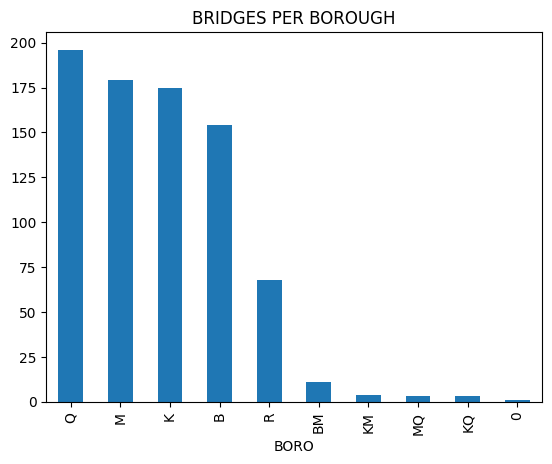

In [20]:
# Bar chart Visualization of Bridges per borough
df['BORO'].value_counts().plot(kind='bar', title='BRIDGES PER BOROUGH')

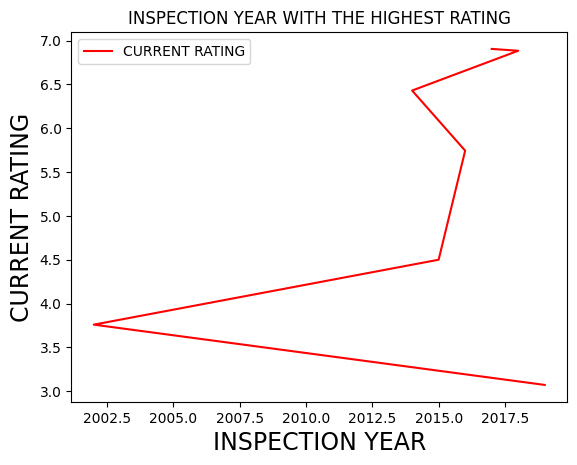

In [21]:
# Line Visualization of Inspection year with the highest rating
df1 = df.groupby(df['INSPECTION YEAR'])['CURRENT RATING'].max().to_frame().sort_values(by = 'CURRENT RATING')
df1.head(20).plot(kind = 'line', color = 'red')
plt.xlabel('INSPECTION YEAR', size = 17)
plt.ylabel('CURRENT RATING', size = 17)
plt.title("INSPECTION YEAR WITH THE HIGHEST RATING")
plt.show()

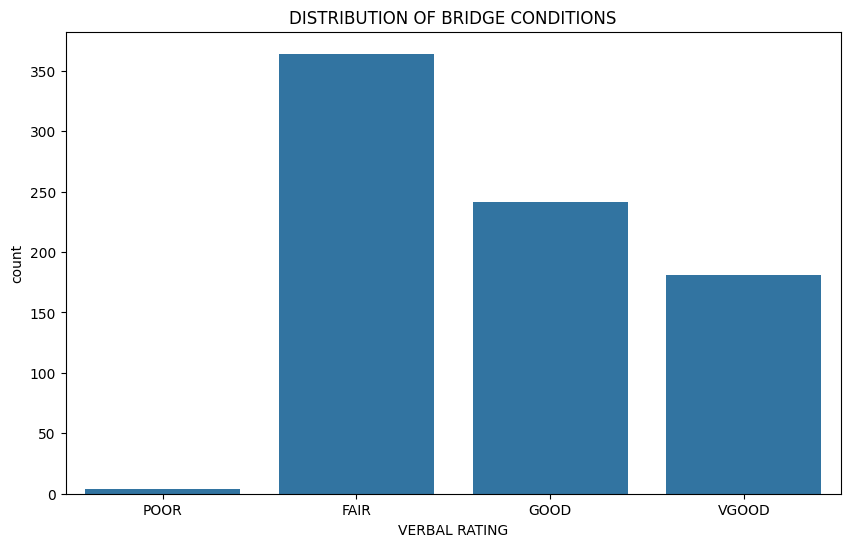

In [22]:
# Bar chart visualization of distribution of bridge conditions
plt.figure(figsize=(10,6))
sns.countplot(x='VERBAL RATING', data=df, order=['POOR','FAIR','GOOD','VGOOD'])
plt.title('DISTRIBUTION OF BRIDGE CONDITIONS')
plt.show()

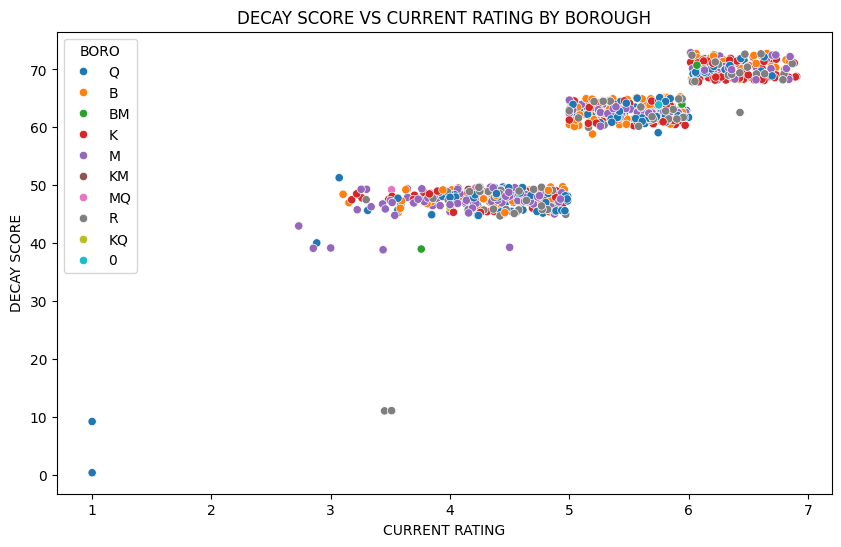

In [23]:
# Scatterplot visualization of decay score against current rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='CURRENT RATING', y='DECAY SCORE', hue='BORO', data=df)
plt.title('DECAY SCORE VS CURRENT RATING BY BOROUGH')
plt.show()

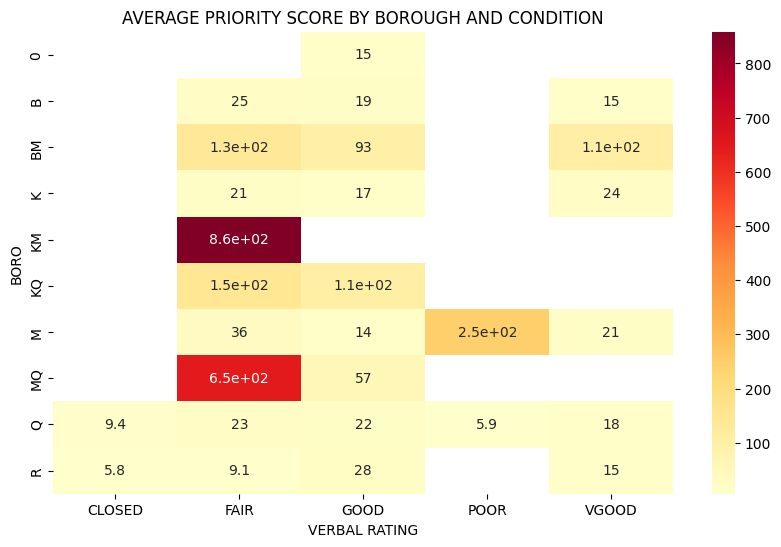

In [24]:
# Heatmap showing te average priority score by borough and condition
pivot = df.pivot_table(values='PRIORITY SCORE', 
                      index='BORO', 
                      columns='VERBAL RATING', 
                      aggfunc='mean')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='YlOrRd')
plt.title('AVERAGE PRIORITY SCORE BY BOROUGH AND CONDITION')
plt.show()

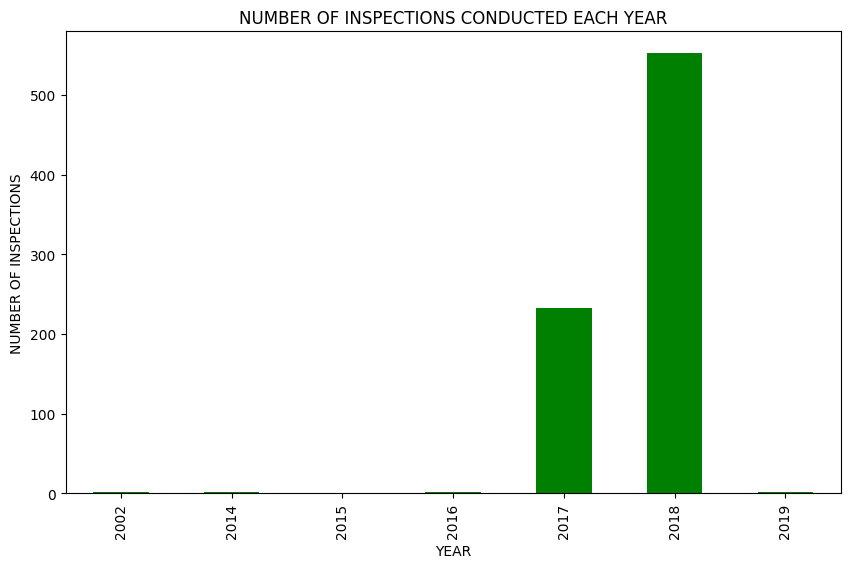

In [25]:
# Barchart showing the number of inspections conducted each year
inspections_by_year = df.groupby('INSPECTION YEAR').size()

plt.figure(figsize=(10,6))
inspections_by_year.plot(kind='bar', color = 'green')
plt.title('NUMBER OF INSPECTIONS CONDUCTED EACH YEAR')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF INSPECTIONS')
plt.show()

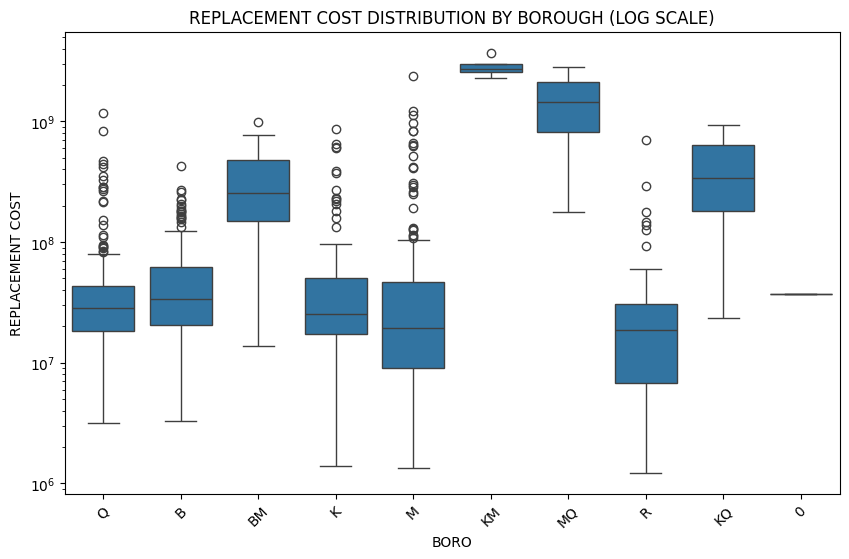

In [26]:
# Boxplot visualization on replacement cost distribution by borough
plt.figure(figsize=(10,6))
sns.boxplot(x='BORO', y='REPLACEMENT COST', data=df)
plt.yscale('log')  # Use log scale due to wide cost range
plt.title('REPLACEMENT COST DISTRIBUTION BY BOROUGH (LOG SCALE)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

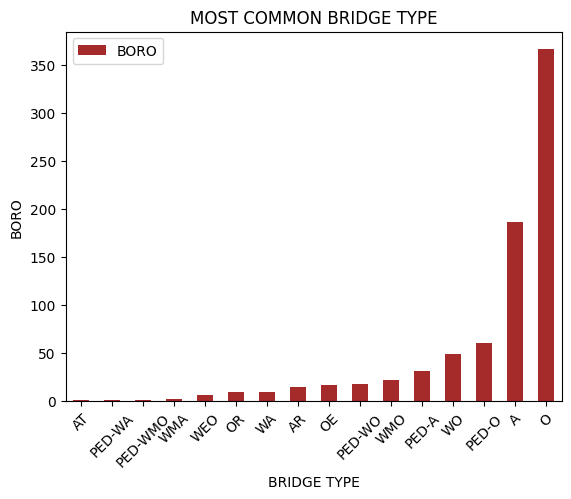

In [27]:
# Visualization of the most common bridge type
plt.figure(figsize=(12,6))
bridge_types = df.groupby(df['BRIDGE TYPE'])['BORO'].count().to_frame().sort_values(by = 'BORO')
bridge_types.plot(kind='bar', color = 'brown')
plt.title('MOST COMMON BRIDGE TYPE')
plt.xlabel('BRIDGE TYPE')
plt.ylabel('BORO')
plt.xticks(rotation=45)
plt.show()

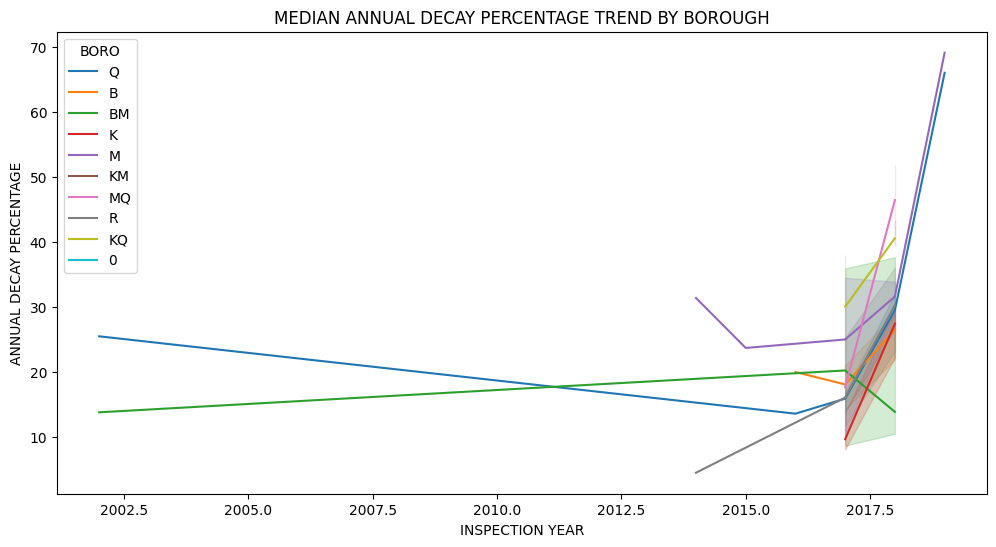

In [28]:
# Visualization of median annual decay percentage trend by borough
plt.figure(figsize=(12,6))
sns.lineplot(x='INSPECTION YEAR', y='ANNUAL DECAY PERCENTAGE', 
             hue='BORO', data=df, estimator='median')
plt.title('MEDIAN ANNUAL DECAY PERCENTAGE TREND BY BOROUGH')
plt.show()

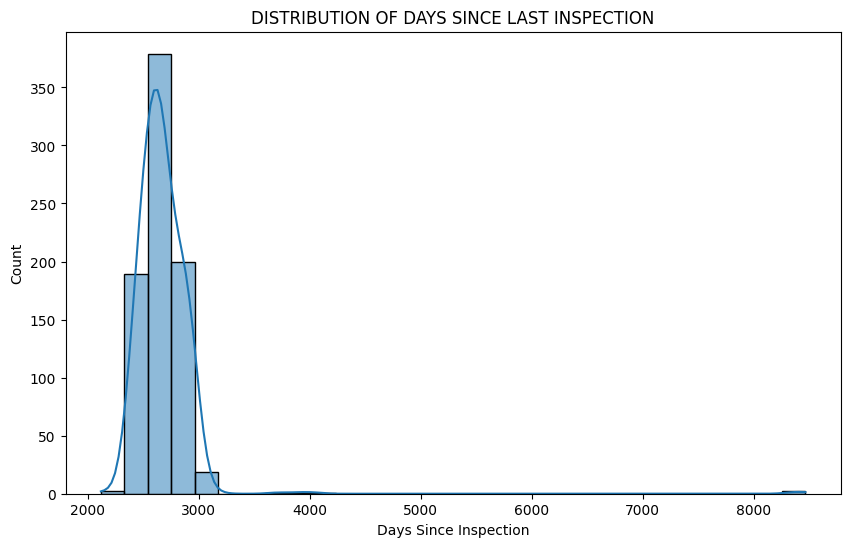

In [29]:
# Histogram visualizing distribution of days since last inspection
plt.figure(figsize=(10,6))
sns.histplot(df['DAYS SINCE INSPECTION'], bins=30, kde=True)
plt.title('DISTRIBUTION OF DAYS SINCE LAST INSPECTION')
plt.xlabel('Days Since Inspection')
plt.show()

<Axes: xlabel='BORO', ylabel='CURRENT RATING'>

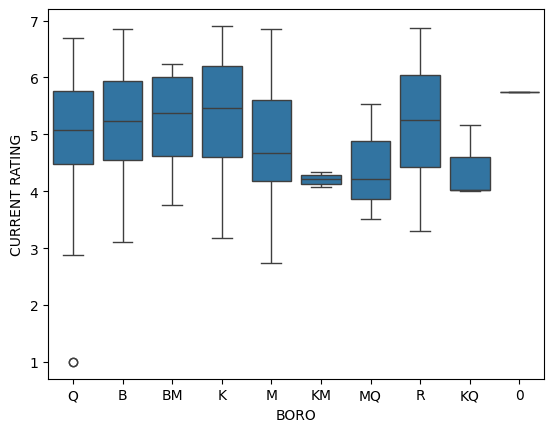

In [30]:
# Boxplot indicating the current rating by boro
sns.boxplot(data=df, y='CURRENT RATING', x='BORO')

<Axes: >

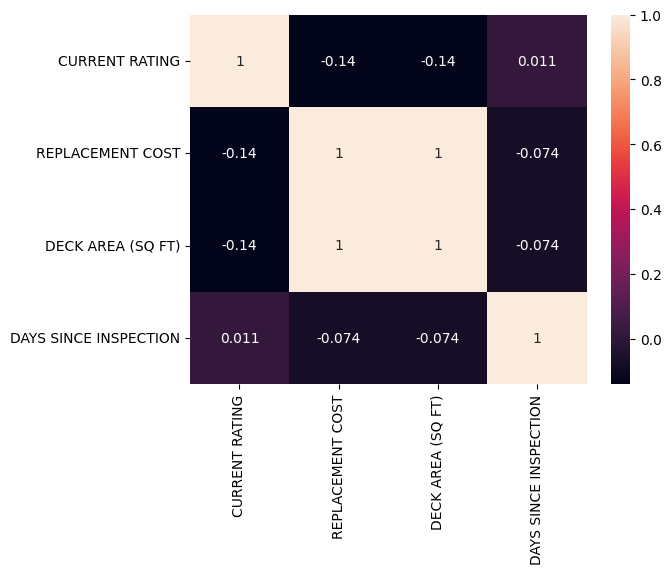

In [31]:
# Heatmap showing the correlation matrix of current rating, replacement cost, deck area and days since last inspection
corr_matrix = df[['CURRENT RATING', 'REPLACEMENT COST', 'DECK AREA (SQ FT)', 'DAYS SINCE INSPECTION']].corr()
sns.heatmap(corr_matrix, annot=True)

# RandomTreeForest Regressor Model

In [32]:
print(df.columns.tolist())

['BIN', 'BORO', 'FEATURE CARRIED', 'FEATURE CROSSED', 'BRIDGE TYPE', 'SPANS', 'RATING SOURCE', 'INSPECTION DATE', 'GENERAL RECOMMENDATION', 'CURRENT RATING', 'VERBAL RATING', 'DECK AREA (SQ FT)', 'REPLACEMENT COST', 'X - COORD  (LAT)', 'Y - COORD   (LON)', 'CD', 'VERBAL SCORE', 'NORMALIZED CURRENT', 'DAYS SINCE INSPECTION', 'INSPECTION SCORE', 'DECAY SCORE', 'INSPECTION YEAR', 'INSPECTION MONTH', 'INSPECTION DAY', 'ANNUAL DECAY PERCENTAGE', 'PRIORITY SCORE']


In [34]:
# Prepare features and target
X = df.drop("DECAY SCORE", axis=1)
y = df["DECAY SCORE"]

# Convert timestamps to numeric (Unix timestamps)
if "INSPECTION DATE" in X.columns:
    X["INSPECTION DATE"] = pd.to_datetime(X["INSPECTION DATE"])
    X["DAYS SINCE INSPECTION"] = (datetime.now() - X["INSPECTION DATE"]).dt.days

# Define numeric and categorical features (updated)
numeric_features = [
    "DAYS SINCE INSPECTION", "CURRENT RATING", "VERBAL SCORE",
    "NORMALIZED CURRENT", "INSPECTION SCORE", "ANNUAL DECAY PERCENTAGE",
    "PRIORITY SCORE", "SPANS", "DECK AREA (SQ FT)", "REPLACEMENT COST",
    "X - COORD  (LAT)", "Y - COORD   (LON)"
]

categorical_features = [
    "BORO", "FEATURE CARRIED", "FEATURE CROSSED", 
    "BRIDGE TYPE", "RATING SOURCE", "VERBAL RATING"
]

# Create transformers
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and fit model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ))
])

model.fit(X_train, y_train)

# Predict decay scores for all bridges
df["PREDICTED DECAY"] = model.predict(X)

# Identify bridges most likely to fail next (highest predicted decay)
next_failures = df.sort_values("PREDICTED DECAY", ascending=False).head(5)

# Calculate recommended inspection dates
def calculate_inspection_date(row):
    current_decay = row["PREDICTED DECAY"]
    decay_rate = row["ANNUAL DECAY PERCENTAGE"] / 365  # Daily decay rate
    days_until_critical = (100 - current_decay) / decay_rate
    return datetime.now() + timedelta(days=days_until_critical)

next_failures["RECOMMENDED INSPECTION DATE"] = next_failures.apply(calculate_inspection_date, axis=1)

# Display results
print("Bridges Most Likely to Fail Next:")
print(next_failures[[
    "BIN", "PREDICTED DECAY", "CURRENT RATING", 
    "DAYS SINCE INSPECTION", "RECOMMENDED INSPECTION DATE"
]].to_string(index=False))

# Model evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nModel RMSE: {rmse:.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Feature importance analysis
feature_importances = pd.DataFrame({
    "feature": model.named_steps["preprocessor"].get_feature_names_out(),
    "importance": model.named_steps["regressor"].feature_importances_
}).sort_values("importance", ascending=False)

print("\nTop Predictive Features:")
print(feature_importances.head(10).to_string(index=False))

Bridges Most Likely to Fail Next:
    BIN  PREDICTED DECAY  CURRENT RATING  DAYS SINCE INSPECTION RECOMMENDED INSPECTION DATE
2269780        72.529285           6.472                   2428  2029-09-08 07:38:45.413061
2241390        72.527227           6.656                   2422  2032-10-07 00:57:22.887787
2269740        72.526411           6.607                   2428  2031-08-03 10:38:24.459195
2245319        72.526212           6.017                   2375  2027-06-28 10:49:41.223377
2241200        72.525276           6.062                   2393  2027-08-12 11:17:48.689956

Model RMSE: 2.58
R² Score: 0.94

Top Predictive Features:
                     feature  importance
           num__VERBAL SCORE    0.395928
     num__NORMALIZED CURRENT    0.266863
         num__CURRENT RATING    0.264903
    cat__VERBAL RATING_VGOOD    0.026046
       num__INSPECTION SCORE    0.011755
     cat__VERBAL RATING_GOOD    0.011479
  num__DAYS SINCE INSPECTION    0.010319
     cat__VERBAL RATING_FAI

In [37]:
# Add predictions to original data
df_with_predictions = df.copy()
df_with_predictions["PREDICTED DECAY"] = model.predict(X)

# Save all bridges with predictions
df_with_predictions.to_csv("all_bridges_with_predictions.csv", index=False)
print("Saved all bridge predictions to 'all_bridges_with_predictions.csv'")

Saved all bridge predictions to 'all_bridges_with_predictions.csv'


In [36]:
mean_decay_score = df["DECAY SCORE"].mean()
std_decay_score = df["DECAY SCORE"].std()
print(f"Mean Decay Score: ${mean_decay_score:,.2f}")
print(f"Standard Deviation: ${std_decay_score:,.2f}")

Mean Decay Score: $57.07
Standard Deviation: $10.21


# Conclusion

Working on this bridge decay prediction project, I was able to see how machine learning can actually help predict the condition of infrastructure over time. Using models like Random Forest, I was able to identify key factors that influence bridge deterioration — things like the age of the bridge, its materials, and location really stood out.

The results were promising and show that with the right data, we can build tools to support early intervention and smarter planning. This kind of approach could really help teams prioritize which bridges need attention first, which ultimately means safer roads and more efficient use of resources.

Overall, this was a solid step toward using data science to solve real engineering problems.